In [22]:
import os
os.chdir("../src")
from tool_preprocess_onehot import state_df_zip, convert_to_str






os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [23]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [24]:
df["State"]=state_df_zip(df)

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess_onehot.py:92: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)


In [25]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,None,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,None,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,None,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,None,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,None,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,None,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,None,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,None,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,None,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [26]:
df.fillna("Unknown or not specified", inplace=True)

C:\Users\unaif\AppData\Local\Temp\ipykernel_11948\4206166486.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown or not specified' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown or not specified", inplace=True)


In [27]:
df["Consumer disputed?"].unique()

array(['Unknown or not specified', 'Yes', 'No'], dtype=object)

In [28]:
import datetime
df["Date received"] = pd.to_datetime(df["Date received"], format="%Y-%m-%d")
df["weekday"]=df["Date received"].dt.weekday

def obtener_dia_semana(numero_dia):
    dias_semana = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    return dias_semana[numero_dia]



In [29]:
df["weekday"]=df["weekday"].apply(obtener_dia_semana)
df["weekday"]

0        Thursday
1        Thursday
2        Thursday
3        Thursday
4        Thursday
           ...   
28151    Thursday
28152    Thursday
28153    Thursday
28154    Thursday
28155    Thursday
Name: weekday, Length: 28156, dtype: object

In [30]:
df=df.drop(columns=["Date received",	"Date sent to company" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="Unknown or not specified"]

In [31]:
df.drop(columns=["Complaint ID", "ZIP code"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,Company,Company response,Timely response?,Consumer disputed?,weekday
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Unknown or not specified,Unknown or not specified,RBS Citizens,Closed with explanation,Yes,Yes,Thursday
6,Consumer loan,Installment loan,Managing the loan or lease,Unknown or not specified,Unknown or not specified,"CashCall, Inc.",Closed with explanation,Yes,Yes,Wednesday
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,Unknown or not specified,Cottonwood Financial Ltd.,Closed with explanation,Yes,Yes,Wednesday
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,Unknown or not specified,Account Liquidation Services Inc.,Closed with non-monetary relief,Yes,Yes,Wednesday
22,Debt collection,Unknown or not specified,Improper contact or sharing of info,Contacted me after I asked not to,Unknown or not specified,"Municipal Collections Services, Inc.",Closed with explanation,Yes,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,Unknown or not specified,Improper use of my credit report,Report improperly shared by CRC,Unknown or not specified,Experian,Closed with explanation,Yes,No,Thursday
28150,Credit card,Unknown or not specified,Late fee,Unknown or not specified,Unknown or not specified,U.S. Bancorp,Closed with monetary relief,Yes,No,Thursday
28151,Debt collection,Unknown or not specified,Cont'd attempts collect debt not owed,Debt is not mine,Unknown or not specified,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No,Thursday
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Unknown or not specified,Unknown or not specified,Regions,Closed with non-monetary relief,Yes,No,Thursday


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             6006 non-null   object
 1   Sub-product         6006 non-null   object
 2   Issue               6006 non-null   object
 3   Sub-issue           6006 non-null   object
 4   State               6006 non-null   object
 5   Company             6006 non-null   object
 6   Company response    6006 non-null   object
 7   Timely response?    6006 non-null   object
 8   Consumer disputed?  6006 non-null   object
 9   weekday             6006 non-null   object
dtypes: object(10)
memory usage: 516.1+ KB


In [33]:
X=df.drop(columns=["Consumer disputed?"])

In [34]:
y=df["Consumer disputed?"]

In [35]:
import optuna
from optuna import Trial

from optuna.distributions import IntDistribution, CategoricalDistribution, FloatDistribution

param = {
 'classifier__n_neighbors': optuna.distributions.IntDistribution(3, 25),
    'classifier__weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
    'classifier__algorithm': optuna.distributions.CategoricalDistribution(['auto', 'ball_tree', 'kd_tree', 'brute']),
    'classifier__leaf_size': optuna.distributions.IntDistribution(10, 60),
    'classifier__p': optuna.distributions.IntDistribution(1, 2),  # 1: Manhattan, 2: Euclidean
    'classifier__metric': optuna.distributions.CategoricalDistribution(['minkowski', 'euclidean', 'manhattan']),
}

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier


from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Identify feature types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()




# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing with type conversion fix


categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown or not specified')),  # opcional
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
model=KNeighborsClassifier()

# Complete pipeline with ADASYN
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', ADASYN(random_state=42)),
    ('classifier', model)
])

# Train the pipeline

In [37]:
trained_preprocessor = model_pipeline.named_steps['preprocessor']


In [38]:
trained_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='Unknown '
                                                                           'or '
                                                                           'not '
                                                                           'specified',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Product', 'Sub-product', 'Issue',
                                  'Sub-issue', 'State', 'Company',
                                  'Company response', 'Timely response?',
                                  'weekday'])])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.2, random_state=42, shuffle=True)

In [40]:
from sklearn.model_selection import StratifiedKFold
from optuna.integration import OptunaSearchCV

optuna_search = OptunaSearchCV(
    estimator=model_pipeline,
    param_distributions=param,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
    n_trials=150,  # Number of trials/studies
    timeout=None,  # Or set a time limit (in seconds)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

optuna_search.fit(X_train, y_train)

C:\Users\unaif\AppData\Local\Temp\ipykernel_11948\1706620755.py:4: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-08-06 13:21:16,923] A new study created in memory with name: no-name-edb51a2b-46c7-495e-b902-62edab184e55
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\neighbors\_base.py:598: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\unaif\anaconda3\envs\projecto\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Det

OptunaSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
               estimator=Pipeline(steps=[('preprocessor',
                                          ColumnTransformer(transformers=[('num',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer()),
                                                                                           ('scaler',
                                                                                            StandardScaler())]),
                                                                           []),
                                                                          ('cat',
                                                                           Pipeline(steps=[('imputer',
                                                                                            SimpleImputer(fill_value='Unknown '
                                                                                                                     'or '
                                                                                                                     'not '
                                                                                                                     'specified',
                                                                                                          strategy='constant')),
                                                                                           ('enc...
                                    'classifier__metric': CategoricalDistribution(choices=('minkowski', 'euclidean', 'manhattan')),
                                    'classifier__n_neighbors': IntDistribution(high=25, log=False, low=3, step=1),
                                    'classifier__p': IntDistribution(high=2, log=False, low=1, step=1),
                                    'classifier__weights': CategoricalDistribution(choices=('uniform', 'distance'))},
               random_state=42, scoring='f1_macro', verbose=2)

In [41]:
model_pipeline.set_params(**optuna_search.best_params_)
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown '
                                                                                            'or '
                                                                                            'not '
                                                                                            'specified',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Product', 'Sub-product',
                                                   'Issue', 'Sub-issue',
                                                   'State', 'Company',
                                                   'Company response',
                                                   'Timely response?',
                                                   'weekday'])])),
                ('oversampler', ADASYN(random_state=42)),
                ('classifier',
                 KNeighborsClassifier(leaf_size=41, n_neighbors=4, p=1,
                                      weights='distance'))])

In [42]:
y_probs = pd.DataFrame(model_pipeline.predict_proba(X_test)[:, 1])
y_probs

,0
0,0.800000
1,1.000000
2,1.000000
3,1.000000
4,0.833333
...,...
4800,1.000000
4801,1.000000
4802,1.000000
4803,0.750000


In [51]:
y_pred = (y_probs[0] > 0.8).astype(int)
y_pred


0       0
1       1
2       1
3       1
4       1
       ..
4800    1
4801    1
4802    1
4803    0
4804    0
Name: 0, Length: 4805, dtype: int64

In [52]:
y_pred.value_counts()

0
1    2562
0    2243
Name: count, dtype: int64

In [53]:


y_test=pd.DataFrame(y_test).replace(to_replace=["Yes", "No"], value=[1, 0] )


Accuracy: 0.5392299687825182
f1 score: 0.6497943688706106
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.51      0.33      1045
           1       0.80      0.55      0.65      3760

    accuracy                           0.54      4805
   macro avg       0.52      0.53      0.49      4805
weighted avg       0.68      0.54      0.58      4805

[[0.5138756 0.4861244]
 [0.4537234 0.5462766]]
Confusion Matrix:


<Axes: >

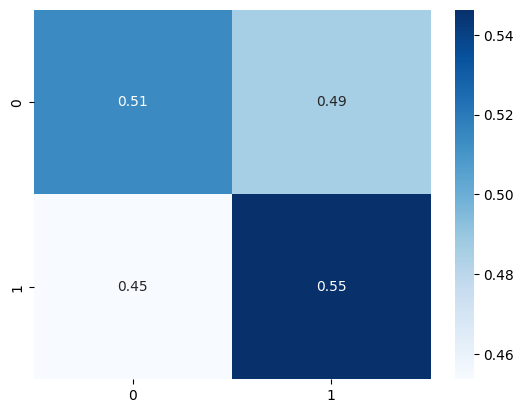

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from seaborn import heatmap
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"f1 score: {f1score}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='true' ))
print("Confusion Matrix:")
heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, fmt=".2f", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])


In [55]:
import numpy as np
thresholds = np.arange(.001, 1.01, 0.01)

best_threshold = 0
best_f1 = 0

for t in thresholds:
    # Convertir probabilidades en etiquetas según el threshold
    y_pred_t =  (y_probs[0] > t).astype(int)
    ()
    
    # Calcular F1 para ese threshold
    current_f1 = f1_score(y_test, y_pred_t)
    
    # Guardar si es mejor que el mejor hasta ahora
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_threshold = t

print(f"Mejor umbral (threshold) para F1: {best_threshold}")
print(f"Mejor F1 obtenido: {best_f1}")

Mejor umbral (threshold) para F1: 0.001
Mejor F1 obtenido: 0.8656574085111456


In [56]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(model_pipeline, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.7110743801652892
0.027131591430886243


In [57]:
import os 
import pickle
os.chdir("../models")

"""with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:
    pickle.dump(model_pipeline, f)"""

"with open('modelo_pipe_dispute_randomforest.pkl', 'wb') as f:\n    pickle.dump(model_pipeline, f)"

In [58]:
---
import dill
with open("modelo_pipe_dispute_knn_onehot_company_.pkl", "wb") as f:
    dill.dump(model_pipeline, f)

SyntaxError: invalid syntax (2980051529.py, line 1)

In [ ]:
trained_preprocessor.transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 53193 stored elements and shape (6006, 439)>

In [ ]:
dense_array = trained_preprocessor.transform(X).toarray()  # convert sparse to dense

# Create DataFrame
df = pd.DataFrame(trained_preprocessor.transform(X))

print(df.shape)
print(df.head())

(6006, 1)
                                                   0
0  <Compressed Sparse Row sparse matrix of dtype ...
1  <Compressed Sparse Row sparse matrix of dtype ...
2  <Compressed Sparse Row sparse matrix of dtype ...
3  <Compressed Sparse Row sparse matrix of dtype ...
4  <Compressed Sparse Row sparse matrix of dtype ...


In [ ]:
import pandas as pd

df_sparse = pd.DataFrame.sparse.from_spmatrix(trained_preprocessor.transform(X))
print(df_sparse.shape)
print(df_sparse.head())


(6006, 439)
   0    1    2    3    4    5    6    7    8    9    ...  429  430  431  432  \
0    0    0    0    0    0    0  1.0    0    0    0  ...    0    0  1.0    0   
1    0  1.0    0    0    0    0    0    0    0    0  ...    0    0  1.0    0   
2    0    0    0    0  1.0    0    0    0    0    0  ...    0    0  1.0    0   
3    0    0    0    0  1.0    0    0    0    0    0  ...  1.0    0  1.0    0   
4    0    0    0    0  1.0    0    0    0    0    0  ...    0    0  1.0    0   

   433  434  435  436  437  438  
0    0    0    0  1.0    0    0  
1    0    0    0    0    0  1.0  
2    0    0    0    0    0  1.0  
3    0    0    0    0    0  1.0  
4    0    0    0    0    0  1.0  

[5 rows x 439 columns]


In [ ]:
df_sparse


,0,1,2,3,4,5,6,7,8,9,...,429,430,431,432,433,434,435,436,437,438
0,0,0,0,0,0,0,1.0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
1,0,1.0,0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
2,0,0,0,0,1.0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
3,0,0,0,0,1.0,0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,0,0,1.0
4,0,0,0,0,1.0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6001,0,0,0,1.0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6002,0,0,1.0,0,0,0,0,0,0,0,...,0,0,1.0,0,0,0,0,1.0,0,0
6003,0,0,0,0,1.0,0,0,0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
6004,0,0,0,0,0,0,1.0,0,0,0,...,1.0,0,1.0,0,0,0,0,1.0,0,0
